In [18]:
from learningAgents import ReinforceAlgorithm
from environmentModel import Model, AdversaryModes
import torch
import torch.nn as nn
from torch.distributions import Categorical
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
def NeuralNetwork():
    lr = .0009
    num_episodes = 20

    nn_ = 100

    policy = nn.Sequential(
                           nn.Linear(2, nn_), 
                           nn.ReLU(),
                           nn.Linear(nn_,nn_),
                           nn.ReLU(),
                           nn.Linear(nn_,10),                       
                           nn.Softmax(dim=0))
    optim = torch.optim.Adam(policy.parameters(), lr=lr)

    return policy, optim

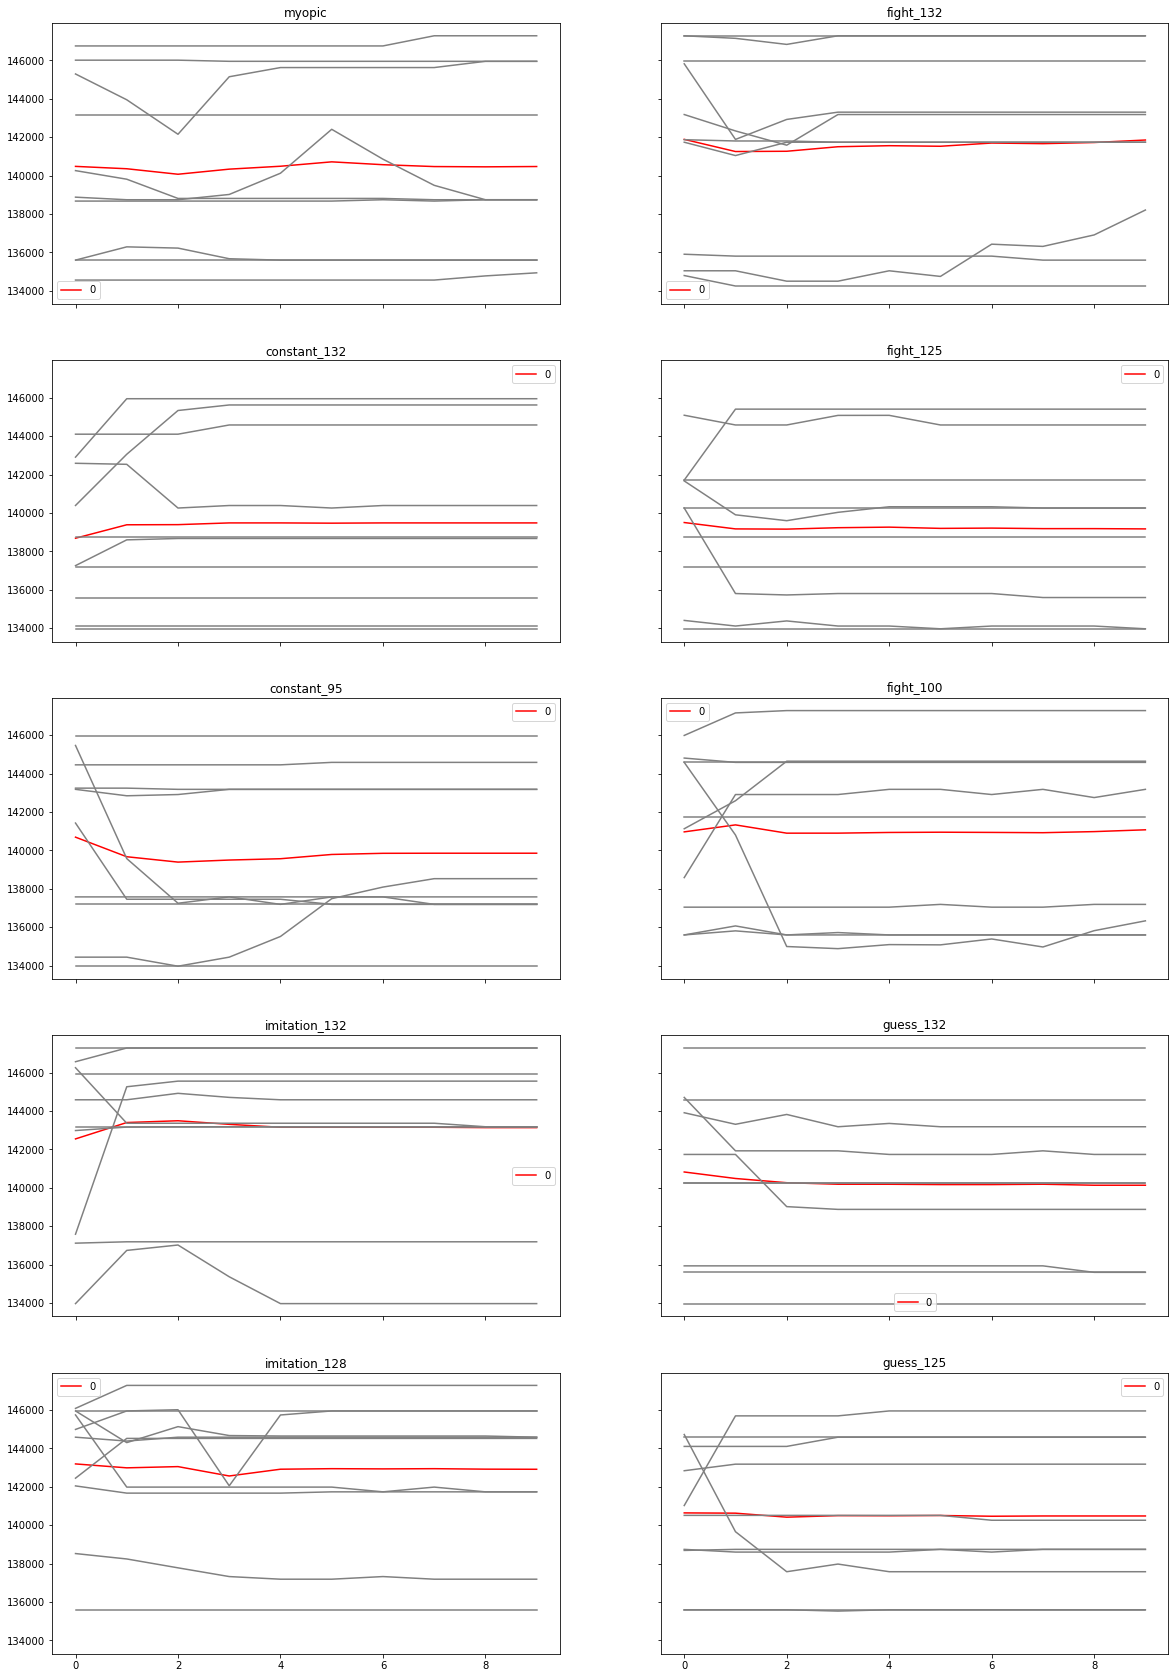

In [30]:
fig, axes = plt.subplots(nrows=5, ncols=2,sharex=True,sharey=True,figsize=(20,30))

for mode in AdversaryModes:
    game = Model(totalDemand = 400, 
               tupleCosts = (57, 71),
              totalStages = 25,
            initState = [400/2,0], adversaryMode=AdversaryModes.myopic)
    algorithm = ReinforceAlgorithm(game, NeuralNetwork, numberIterations=10, numberEpisodes=10, discountFactor =0.5)
    algorithm.solver()
    profits = pd.DataFrame(game.profit).T
    prices = pd.DataFrame(game.prices).T
    demandPotential = pd.DataFrame(game.demandPotential).T
    
    learning = pd.DataFrame(algorithm.returns.mean(axis = 0))
    ax=learning.plot(color='r', title=mode.name, ax=axes[mode.value%5][int(mode.value/5)],label='avg')
    for i in range(algorithm.numberIterations):
        ax.plot((pd.DataFrame(algorithm.returns[i])),color='gray')

    